In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import psycopg2
import pandas as pd
import psycopg2.extras
import seaborn as sns
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "ahanaf12",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [6]:
con = PostgresConnection().getConnection()

successfully connected to database


# Q1: Find the division wise total_sale_price joining fact table and respective dimension table

In [7]:
def changetype(x):
    x['sales']=x['sales'].astype('float64')  

successfully connected to database


,sales
division,
BARISAL,7520343.75
CHITTAGONG,19763595.00
DHAKA,40764619.75
KHULNA,11311610.50
RAJSHAHI,12099196.00
RANGPUR,8429836.50
SYLHET,5512234.25


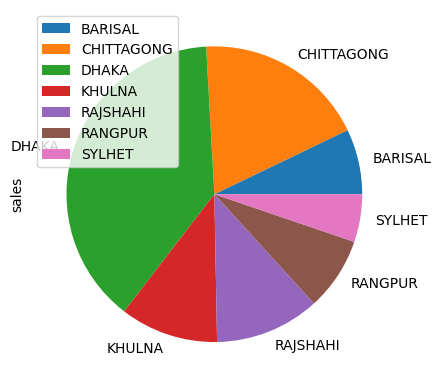

<Figure size 1000x500 with 0 Axes>

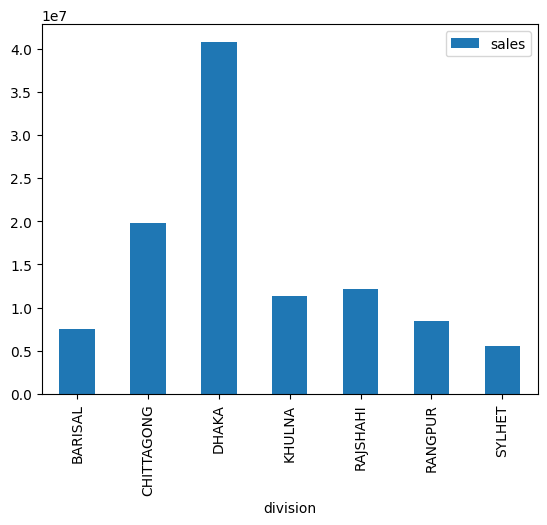

In [8]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
              "FROM star_schema.\"Fact_table\" t " \
              "JOIN star_schema.\"Store_dim\" s on s.store_key=t.store_key " \
                "GROUP BY CUBE(s.division) " \
                "ORDER BY s.division "
cur.execute(select_stmt)
records = cur.fetchall()

df = pd.DataFrame(records, columns=['division', 'sales'])
df =df.drop(df.index[-1])
df = df.set_index(['division'])

changetype(df)
df.plot.pie(y='sales')
plt.figure(figsize=(10,5))
df.plot.bar(y='sales')

division_total_sales = df
division_total_sales

successfully connected to database


,sales
year,
2014.0,14334731.25
2015.0,15095720.25
2016.0,14976508.25
2017.0,15015806.00
2018.0,15108197.25
2019.0,14949510.25
2020.0,15037190.25
2021.0,883772.25


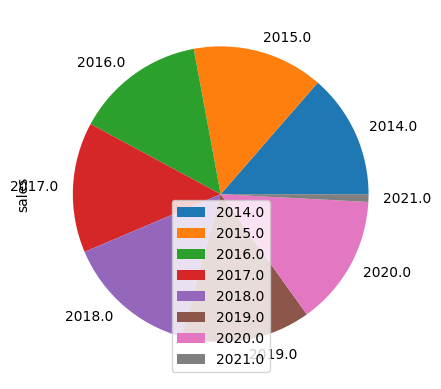

<Figure size 1000x500 with 0 Axes>

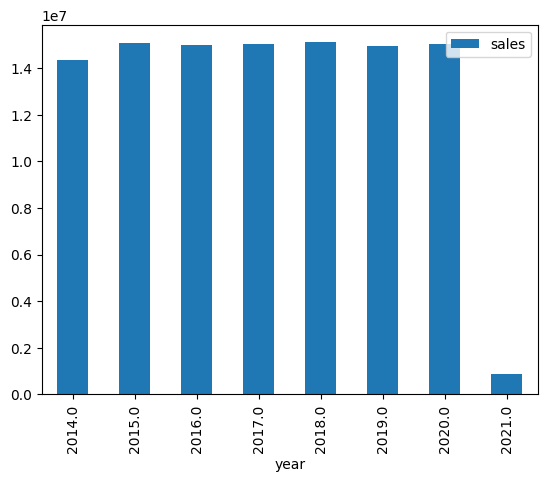

In [9]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.year, SUM(t.total_price) " \
              "FROM star_schema.\"Fact_table\" t " \
              "JOIN star_schema.\"Time_dim\" s on s.time_key=t.time_key " \
                "GROUP BY CUBE(s.year) " \
                "ORDER BY s.year "
cur.execute(select_stmt)
records = cur.fetchall()

df = pd.DataFrame(records, columns=['year', 'sales'])
df = df.drop(df.index[-1])
df = df.set_index(['year'])

changetype(df)
df.plot.pie(y='sales')
plt.figure(figsize=(10,5))
df.plot.bar(y='sales')

year_total_sales = df
year_total_sales

successfully connected to database


,sales
district,
BAGERHAT,1307651.00
BANDARBAN,995360.75
BARGUNA,869041.00
BARISAL,2897237.75
BHOLA,1012205.75
...,...
SIRAJGANJ,1295100.75
SUNAMGANJ,1593774.00
SYLHET,1727717.25


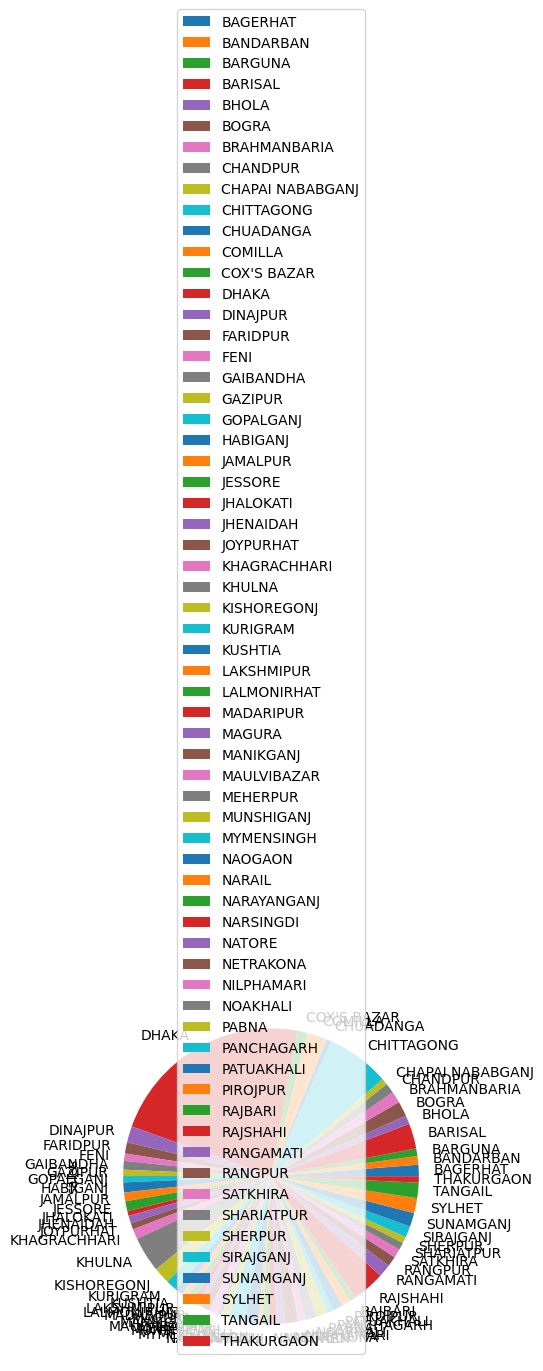

<Figure size 1000x500 with 0 Axes>

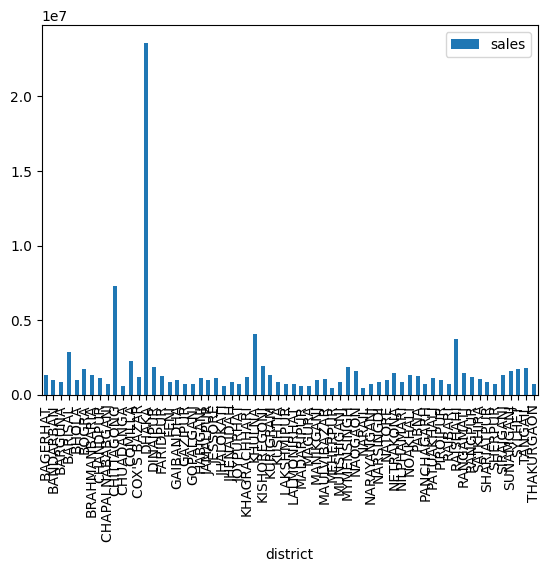

In [10]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.district, SUM(t.total_price) " \
              "FROM star_schema.\"Fact_table\" t " \
              "JOIN star_schema.\"Store_dim\" s on s.store_key=t.store_key " \
                "GROUP BY CUBE(s.district) " \
                "ORDER BY s.district "
cur.execute(select_stmt)
records = cur.fetchall()

df = pd.DataFrame(records, columns=['district', 'sales'])
df = df.drop(df.index[-1])
df = df.set_index(['district'])

changetype(df)
df.plot.pie(y='sales')
plt.figure(figsize=(10,5))
df.plot.bar(y='sales')

district_total_sales = df
district_total_sales

successfully connected to database


,sales
month,
1.0,9042244.00
2.0,8073877.50
3.0,8939152.00
4.0,8504634.75
5.0,9078002.50
6.0,8556853.00
7.0,9046580.00
8.0,8929475.25
9.0,8724326.50


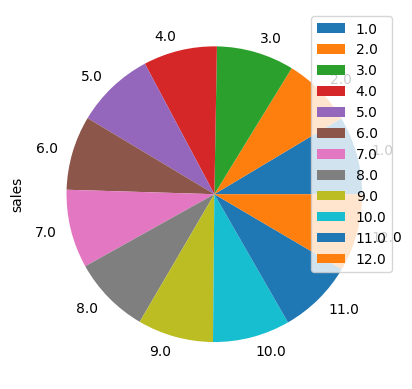

<Figure size 1000x500 with 0 Axes>

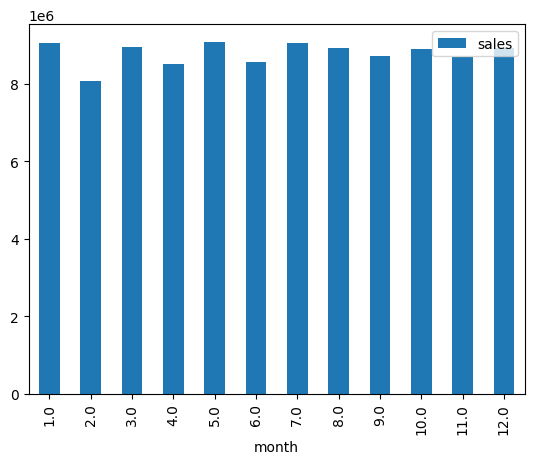

In [11]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.month, SUM(t.total_price) " \
              "FROM star_schema.\"Fact_table\" t " \
              "JOIN star_schema.\"Time_dim\" s on s.time_key=t.time_key " \
                "GROUP BY CUBE(s.month) " \
                "ORDER BY s.month "
cur.execute(select_stmt)
records = cur.fetchall()

df = pd.DataFrame(records, columns=['month', 'sales'])
df = df.drop(df.index[-1])
df = df.set_index(['month'])

changetype(df)
df.plot.pie(y='sales')
plt.figure(figsize=(10,5))
df.plot.bar(y='sales')

month_total_sales = df
month_total_sales

In [12]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.name, SUM(t.total_price) " \
              "FROM star_schema.\"Fact_table\" t " \
              "JOIN star_schema.\"Customer_dim\" s on s.customer_key=t.customer_key " \
                "GROUP BY CUBE(s.name) " \
                "ORDER BY s.name "
cur.execute(select_stmt)
records = cur.fetchall()

df = pd.DataFrame(records, columns=['Customer Name', 'sales'])
df = df.drop(df.index[-1])
df = df.set_index(['Customer Name'])

customer_total_sales = df
customer_total_sales

successfully connected to database


,sales
Customer Name,
-,20643.50
aafreen fatima,11174.75
aafrin,22136.75
aafrin @ dolly,23529.75
aaftaab husan,9682.00
...,...
बबीता,10509.75
मन्जू,10575.75
माया,9862.50


successfully connected to database


,sales
Bank Name,
AB Bank Limited,2728515.50
Bangladesh Commerce Bank Limited,2730999.25
Bank Asia Limited,2687142.75
Bengal Commercial Bank Ltd,2704554.25
Bkash,2689352.50
BRAC Bank Limited,2705795.75
Citizens Bank Limited,2723215.25
City Bank Limited,2713952.50
Community Bank Bangladesh Limited,2685751.50


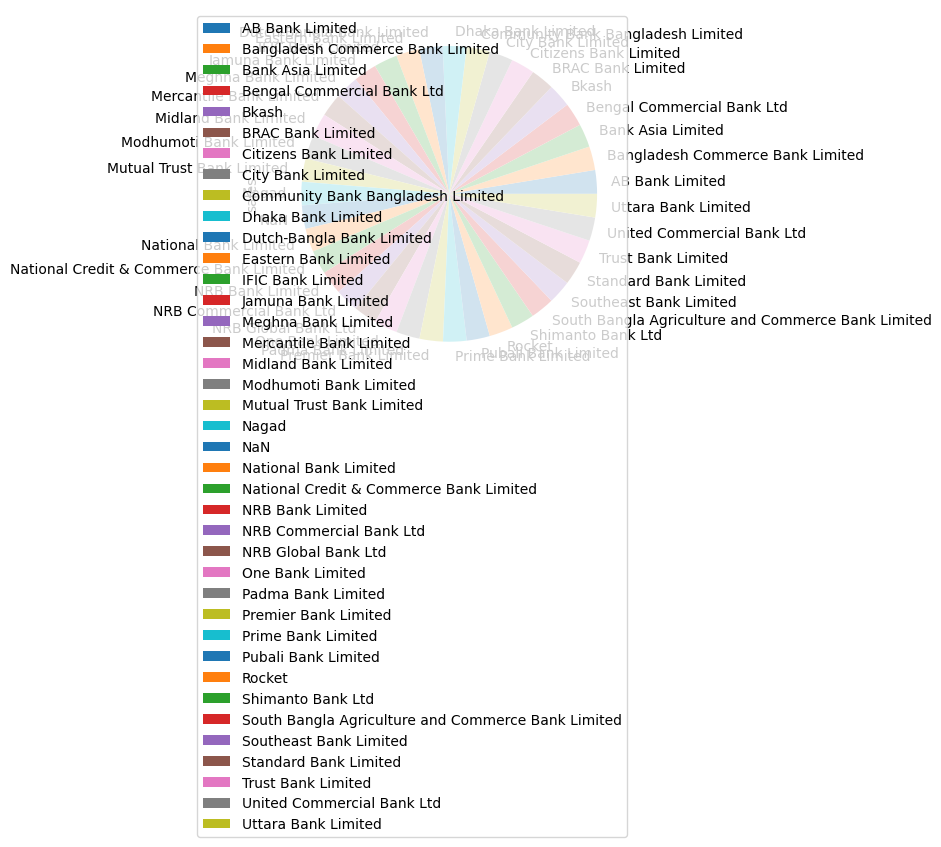

<Figure size 1000x500 with 0 Axes>

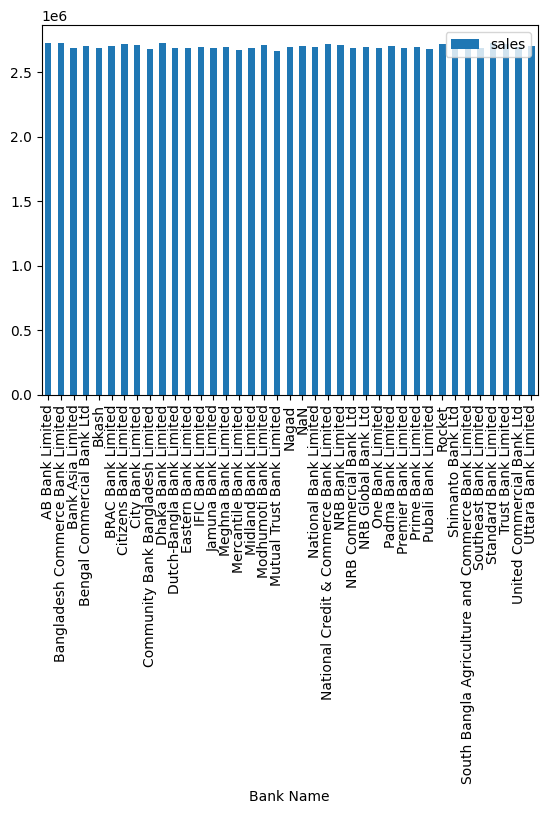

In [13]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.bank_name, SUM(t.total_price) " \
              "FROM star_schema.\"Fact_table\" t " \
              "JOIN star_schema.\"Trans_dim\" s on s.payment_key=t.payment_key " \
                "GROUP BY CUBE(s.bank_name) " \
                "ORDER BY s.bank_name "
cur.execute(select_stmt)
records = cur.fetchall()

df = pd.DataFrame(records, columns=['Bank Name', 'sales'])
df = df.drop(df.index[-1])
df = df.set_index(['Bank Name'])

changetype(df)
df.plot.pie(y='sales')
plt.legend(loc='upper right')
plt.figure(figsize=(10,5))
df.plot.bar(y='sales')


bank_total_sales = df
bank_total_sales

successfully connected to database


,sales
Transaction Type,
card,94583038.50
cash,2708515.75
mobile,8109881.50


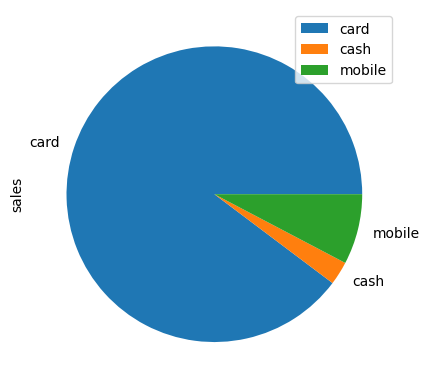

<Figure size 1000x500 with 0 Axes>

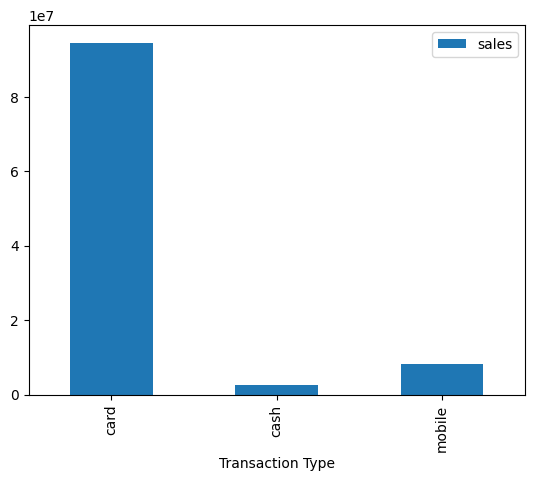

In [14]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.trans_type, SUM(t.total_price) " \
              "FROM star_schema.\"Fact_table\" t " \
              "JOIN star_schema.\"Trans_dim\" s on s.payment_key=t.payment_key " \
                "GROUP BY CUBE(s.trans_type) " \
                "ORDER BY s.trans_type "
cur.execute(select_stmt)
records = cur.fetchall()

df = pd.DataFrame(records, columns=['Transaction Type', 'sales'])
df = df.drop(df.index[-1])
df = df.set_index(['Transaction Type'])

changetype(df)
df.plot.pie(y='sales')
plt.figure(figsize=(10,5))
df.plot.bar(y='sales')

transaction_total_sales = df
transaction_total_sales

In [16]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
              "FROM star_schema.\"Fact_table\" t " \
              "JOIN star_schema.\"Store_dim\" s on s.store_key=t.store_key " \
                "WHERE s.division = 'BARISAL'" \
                "GROUP BY s.division"
cur.execute(select_stmt)
records = cur.fetchall()

df = pd.DataFrame(records, columns=['District', 'Total Sales'])
df = df.set_index(['District'])

barisal_total_sales = df
barisal_total_sales

successfully connected to database


,Total Sales
District,
BARISAL,7520343.75


In [17]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.year, SUM(t.total_price) " \
              "FROM star_schema.\"Fact_table\" t " \
              "JOIN star_schema.\"Time_dim\" s on s.time_key=t.time_key " \
                "WHERE s.year = 2015 " \
                "GROUP BY s.year " 
cur.execute(select_stmt)
records = cur.fetchall()

df = pd.DataFrame(records, columns=['Year', 'Total Sales'])
df = df.set_index(['Year'])

year_2015_total_sales = df
year_2015_total_sales

successfully connected to database


,Total Sales
Year,
2015,15095720.25


In [18]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.year, p.division, SUM(t.total_price) " \
              "FROM star_schema.\"Fact_table\" t " \
              "JOIN star_schema.\"Time_dim\" s on s.time_key=t.time_key " \
                "JOIN star_schema.\"Store_dim\" p on p.store_key=t.store_key " \
                "WHERE s.year = 2015 AND p.division = 'BARISAL'" \
                "GROUP BY s.year, p.division" 
cur.execute(select_stmt)
records = cur.fetchall()

df = pd.DataFrame(records, columns=['Year', 'Division', 'Total Sales'])
df = df.set_index(['Division'])

year_2015_barisal_total_sales = df
year_2015_barisal_total_sales

successfully connected to database


,Year,Total Sales
Division,,
BARISAL,2015,1076902.75


In [19]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT store_key, item_name, quantity " \
              "FROM (" \
                    "SELECT s.store_key, p.item_name, SUM(t.quantity) AS quantity, " \
                    "ROW_NUMBER() OVER (PARTITION BY s.store_key ORDER BY SUM(t.quantity) DESC) AS row_num " \
                    "FROM star_schema.\"Fact_table\" t " \
                    "JOIN star_schema.\"Store_dim\" s on s.store_key=t.store_key " \
                    "JOIN star_schema.\"Item_dim\" p on p.item_key=t.item_key " \
                    "GROUP BY s.store_key, p.item_name " \
              ") subquery " \
              "WHERE row_num <= 3 " \
              "ORDER BY store_key, quantity DESC"  
cur.execute(select_stmt)
records = cur.fetchall()

df = pd.DataFrame(records, columns=['Store Key', 'Item Name', 'Quantity Sales'])

store_item_quantity_sales = df

print(store_item_quantity_sales.columns)

for index, row in df.iterrows():
    if index % 3 == 0:
        print("Store Key: {}".format(row['Store Key']))
    print("\t\tItem Name: {}, Quantity Sold: {}".format(row['Item Name'], row['Quantity Sales']))

successfully connected to database
Index(['Store Key', 'Item Name', 'Quantity Sales'], dtype='object')
Store Key: S0001
		Item Name: Pepsi - 12 oz cans, Quantity Sold: 92
		Item Name: Muscle Milk Protein Shake Van. 11oz, Quantity Sold: 90
		Item Name: Hefty Supreme Foam Plates 6 inch, Quantity Sold: 78
Store Key: S0002
		Item Name: Planters Nut-trition 1.5 oz , Quantity Sold: 83
		Item Name: Altoids Small Packs Variety, Quantity Sold: 80
		Item Name: AquaFina Purified Drinking Water 16oz, Quantity Sold: 78
Store Key: S0003
		Item Name: Sprite - 12 oz cans, Quantity Sold: 122
		Item Name: Diet Coke - 12 oz cans, Quantity Sold: 109
		Item Name: Muscle Milk Protein Shake Van. 11oz, Quantity Sold: 76
Store Key: S0004
		Item Name: Kind  Bars Variety Pack 1.4 oz , Quantity Sold: 79
		Item Name: Muscle Milk Protein Shake Van. 11oz, Quantity Sold: 69
		Item Name: Wint O Green LifeSavers Sugar Free, Quantity Sold: 69
Store Key: S0005
		Item Name: Diet Coke - 12 oz cans, Quantity Sold: 144
		Ite

In [28]:
con = PostgresConnection().getConnection()
cur = con.cursor()

select_stmt = "SELECT item_name, quarter " \
              "FROM (" \
                    "SELECT p.item_name, s.quarter, SUM(t.total_price) AS sum, " \
                    "RANK() OVER (PARTITION BY p.item_name ORDER BY SUM(t.total_price) ASC) AS rank " \
                    "FROM star_schema.\"Fact_table\" t " \
                    "JOIN star_schema.\"Time_dim\" s on s.time_key=t.time_key " \
                    "JOIN star_schema.\"Item_dim\" p on p.item_key=t.item_key " \
                    "GROUP BY p.item_name, s.quarter" \
              ") subquery " \
              "WHERE rank = 1 " \
              "ORDER BY item_name"
cur.execute(select_stmt)
records = cur.fetchall()

df = pd.DataFrame(records, columns=["Item Name", "Worst Quarter"])

items_worst_quarter = df
items_worst_quarter

#for index, row in df.iterrows():
#    print("{} -> Worst Quarter: {}".format(row['Item Name'], row['Worst Quarter']))

successfully connected to database


,Item Name,Worst Quarter
0,100% Juice Box Variety 6.75 oz,Q1
1,A&W Root Beer - 12 oz cans,Q2
2,A&W Root Beer Diet - 12 oz cans,Q4
3,Advil 2 pill packets,Q1
4,All Purpose Cleaner 409 Spray,Q1
...,...,...
254,Welch's 100% Juice Variety10 oz,Q2
255,Wint O Green LifeSavers Sugar Free,Q1
256,Wonderful Pistachios (in shell),Q1
257,Yoplait Original Yogurt Variety Pack,Q1


In [27]:
con = PostgresConnection().getConnection() 
cur = con.cursor() 

days = 1000 # input("Days: ") 

select_stmt = "SELECT DISTINCT p.item_name " \
                "FROM star_schema.\"Fact_table\" t " \
                "JOIN star_schema.\"Time_dim\" s on s.time_key=t.time_key " \
                "JOIN star_schema.\"Item_dim\" p on p.item_key=t.item_key " \
                "JOIN star_schema.\"Trans_dim\" r on r.payment_key=t.payment_key " \
                "WHERE s.date > (CURRENT_DATE - INTERVAL '{} day') AND " \
                "(r.trans_type = 'card' OR r.trans_type = 'mobile')".format(days) 
cur.execute(select_stmt) 
records = cur.fetchall()

df = pd.DataFrame(records, columns=["Item Name"]) 
df = df.set_index(['Item Name'])

items_since_days = df 
items_since_days

#for index, row in df.iterrows():
#    print("{}".format(row['Item Name']))

successfully connected to database


""
Item Name
100% Juice Box Variety 6.75 oz
A&W Root Beer - 12 oz cans
A&W Root Beer Diet - 12 oz cans
Advil 2 pill packets
All Purpose Cleaner 409 Spray
...
Welch's 100% Juice Variety10 oz
Wint O Green LifeSavers Sugar Free
Wonderful Pistachios (in shell)


In [22]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.item_name, p.division, SUM(t.total_price) " \
              "FROM star_schema.\"Fact_table\" t " \
              "JOIN star_schema.\"Item_dim\" s on s.item_key=t.item_key " \
                "JOIN star_schema.\"Store_dim\" p on p.store_key=t.store_key " \
                "GROUP BY s.item_name, p.division " \
                "ORDER BY s.item_name, SUM(t.total_price) DESC"
cur.execute(select_stmt)
records = cur.fetchall()

df = pd.DataFrame(records, columns=['Item Name', 'Division', 'Total Sales'])

item_division_sales = df
item_division_sales

for index, row in df.iterrows():
    if index % 7 == 0:
        print("Item Name: {}".format(row['Item Name']))
    print("\t\tDivision: {}, Total Sales: {}".format(row['Division'], row['Total Sales']))

successfully connected to database
Item Name: 100% Juice Box Variety 6.75 oz 
		Division: DHAKA, Total Sales: 141195.0
		Division: CHITTAGONG, Total Sales: 64950.0
		Division: RAJSHAHI, Total Sales: 38730.0
		Division: KHULNA, Total Sales: 37755.0
		Division: RANGPUR, Total Sales: 26685.0
		Division: BARISAL, Total Sales: 23790.0
		Division: SYLHET, Total Sales: 18270.0
Item Name: A&W Root Beer - 12 oz cans
		Division: DHAKA, Total Sales: 107479.0
		Division: CHITTAGONG, Total Sales: 52060.5
		Division: KHULNA, Total Sales: 28382.0
		Division: RAJSHAHI, Total Sales: 27795.5
		Division: RANGPUR, Total Sales: 21597.0
		Division: BARISAL, Total Sales: 19101.5
		Division: SYLHET, Total Sales: 15249.0
Item Name: A&W Root Beer Diet - 12 oz cans
		Division: DHAKA, Total Sales: 61290.00
		Division: CHITTAGONG, Total Sales: 29592.00
		Division: KHULNA, Total Sales: 18191.25
		Division: RAJSHAHI, Total Sales: 17131.50
		Division: RANGPUR, Total Sales: 12129.75
		Division: BARISAL, Total Sales: 1

In [29]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.store_key, p.month, AVG(t.total_price) " \
              "FROM star_schema.\"Fact_table\" t " \
              "JOIN star_schema.\"Store_dim\" s on s.store_key=t.store_key " \
                "JOIN star_schema.\"Time_dim\" p on p.time_key=t.time_key " \
                "GROUP BY s.store_key, p.month " \
                "ORDER BY s.store_key, p.month"
cur.execute(select_stmt)
records = cur.fetchall()

df = pd.DataFrame(records, columns=['Store Key', 'Month', 'Average Sales'])

store_monthly_sales = df
store_monthly_sales

for index, row in df.iterrows():
    if index % 12 == 0:
        print("Store Key: {}".format(row['Store Key']))
    print("\t\tMonth: {}, Average Sales: {}".format(row['Month'], row['Average Sales']))

successfully connected to database
Store Key: S0001
		Month: 1, Average Sales: 97.7543103448275862
		Month: 2, Average Sales: 100.5776699029126214
		Month: 3, Average Sales: 109.4158878504672897
		Month: 4, Average Sales: 98.8805309734513274
		Month: 5, Average Sales: 99.5245535714285714
		Month: 6, Average Sales: 101.2459349593495935
		Month: 7, Average Sales: 103.9189189189189189
		Month: 8, Average Sales: 105.1269531250000000
		Month: 9, Average Sales: 96.1901041666666667
		Month: 10, Average Sales: 104.6166666666666667
		Month: 11, Average Sales: 103.8355855855855856
		Month: 12, Average Sales: 107.8697478991596639
Store Key: S0002
		Month: 1, Average Sales: 98.2902684563758389
		Month: 2, Average Sales: 106.3849557522123894
		Month: 3, Average Sales: 102.7565217391304348
		Month: 4, Average Sales: 104.0798969072164948
		Month: 5, Average Sales: 109.1587591240875912
		Month: 6, Average Sales: 100.9268867924528302
		Month: 7, Average Sales: 95.6513157894736842
		Month: 8, Average Sa

		Month: 8, Average Sales: 113.5292792792792793
		Month: 9, Average Sales: 105.3402777777777778
		Month: 10, Average Sales: 114.9980916030534351
		Month: 11, Average Sales: 101.0077519379844961
		Month: 12, Average Sales: 104.1324786324786325
Store Key: S00399
		Month: 1, Average Sales: 105.3394160583941606
		Month: 2, Average Sales: 103.2005494505494505
		Month: 3, Average Sales: 114.9620535714285714
		Month: 4, Average Sales: 86.6305555555555556
		Month: 5, Average Sales: 96.1921296296296296
		Month: 6, Average Sales: 114.6212871287128713
		Month: 7, Average Sales: 103.8931623931623932
		Month: 8, Average Sales: 100.8034482758620690
		Month: 9, Average Sales: 101.6995798319327731
		Month: 10, Average Sales: 104.4692982456140351
		Month: 11, Average Sales: 97.4611650485436893
		Month: 12, Average Sales: 99.9692307692307692
Store Key: S0040
		Month: 1, Average Sales: 91.9250000000000000
		Month: 2, Average Sales: 108.8355263157894737
		Month: 3, Average Sales: 110.4191176470588235
		Mo

Store Key: S00657
		Month: 1, Average Sales: 111.0495689655172414
		Month: 2, Average Sales: 102.2668067226890756
		Month: 3, Average Sales: 100.7214285714285714
		Month: 4, Average Sales: 99.8098958333333333
		Month: 5, Average Sales: 104.8161764705882353
		Month: 6, Average Sales: 104.9101562500000000
		Month: 7, Average Sales: 112.4740566037735849
		Month: 8, Average Sales: 115.7196261682242991
		Month: 9, Average Sales: 112.7910156250000000
		Month: 10, Average Sales: 110.1571428571428571
		Month: 11, Average Sales: 102.6752336448598131
		Month: 12, Average Sales: 100.7588495575221239
Store Key: S00658
		Month: 1, Average Sales: 105.2429577464788732
		Month: 2, Average Sales: 94.8060747663551402
		Month: 3, Average Sales: 115.4235537190082645
		Month: 4, Average Sales: 104.4636363636363636
		Month: 5, Average Sales: 123.6404958677685950
		Month: 6, Average Sales: 116.4288990825688073
		Month: 7, Average Sales: 102.5021929824561404
		Month: 8, Average Sales: 97.4774436090225564
		Mo